<a href="https://colab.research.google.com/github/sudhakarmlal/EIP4Phase1/blob/master/Assignment1/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


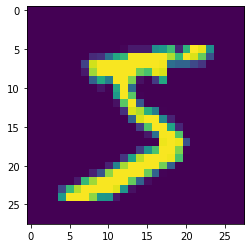

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(BatchNormalization())

# After 3*3 convolution the input is 26*26

model.add(Convolution2D(16, 3, 3, activation='relu'))


# After 3*3 convolution the input to the next layer is 24*24

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

# The input to the next layer is 22*22(after the above 3*3 convolution)

model.add(MaxPooling2D(pool_size=(2, 2)))


# The above max pooling reduced the size to 11 * 11
model.add(Convolution2D(10, 1, 1, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) 
model.add(BatchNormalization())

model.add(Dropout(0.1))
# The above 3*3 convolution reduced the size to 9

model.add(Convolution2D(32, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

#The above 3*3 reduced the size to 7

#  We would  like to stop at 7*7 
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10
60000/60000 [==============================] - 25s 425us/step - loss: 0.1620 - acc: 0.9500
Epoch 2/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0564 - acc: 0.9826
Epoch 3/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0446 - acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.0388 - acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0350 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.0317 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.0280 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0260 - acc: 0.9912
Epoch 9/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.0245 - acc: 0.9917
Epoch 10/10
60000/60000 [==============================] - 20s 337us/step - loss

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.025206961179124483, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.00950389e-12 6.00812872e-11 3.88007031e-08 3.90135909e-07
  2.10034508e-14 7.94681866e-13 7.33599155e-17 9.99999523e-01
  1.05390292e-13 2.27378005e-10]
 [3.49554938e-07 3.99641520e-09 9.99999642e-01 4.47228643e-11
  6.45522427e-13 5.57470262e-14 1.04370352e-08 2.50934384e-10
  2.82506674e-11 4.69533707e-14]
 [1.57842770e-08 9.99989510e-01 8.10473193e-06 1.15121281e-07
  1.31477776e-07 2.18497735e-08 1.64706677e-07 1.98813791e-06
  8.79779893e-09 8.27222735e-09]
 [9.99994397e-01 3.30507149e-10 1.36392870e-08 2.13889653e-08
  9.17820264e-11 2.24388286e-09 3.86371312e-07 3.13601450e-10
  3.46940874e-06 1.79135532e-06]
 [9.42043492e-12 3.25659677e-08 1.03389908e-10 2.40455464e-12
  9.99997973e-01 9.47981207e-11 1.83905793e-10 1.01330229e-10
  5.06269072e-12 1.98722182e-06]
 [4.49556552e-08 9.99864459e-01 9.93039357e-05 3.62469734e-08
  7.93911852e-07 2.59113975e-09 1.87880822e-08 3.53564865e-05
  8.89141560e-09 1.20593128e-07]
 [3.84590363e-13 8.96705956e-07 3.75007048e-09 2.18687290e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored